<a href="https://colab.research.google.com/github/kmykz/ML-course-proj/blob/main/DEI_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<font color='#2a9d8f' size=5 align="left">HAD7001–Applied Machine Learning for Health Data</font><br>
<font color='#919180' size=4 align="left">Instructor: Zahra Shakeri–Winter 2025</font><br>
<font color='#919180' size=3 align="left">Dalla Lana School of Public Health-University of Toronto </font>
<div>
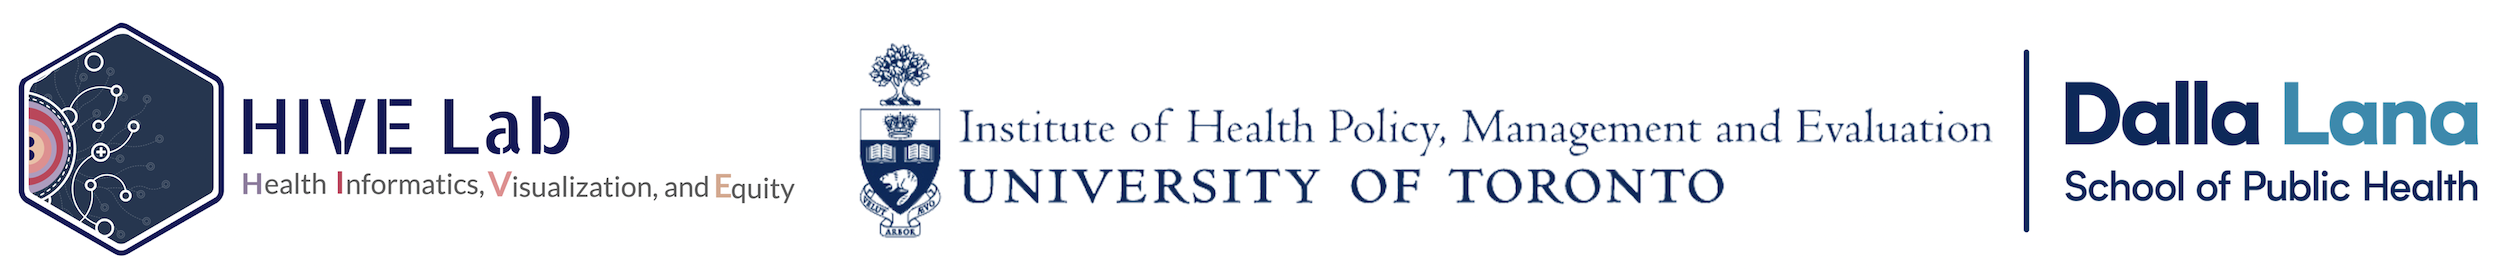
</div>


**Topics Covered: How to Process Text Data**

**Basic Text Processing**  – Applying basic preprocessing techniques to raw text data
*  Text Cleaning (search and replace, handling contractions)
*  Text Data Standardization (removing URLs, removing non-alphabetic characters)
*  Tokenization (splitting text into individual words)
*  Removing Stop Words (removing general and context-sensitive stop words)

**Intermediate Text Processing** - Applying intermediate preprocessing techniques, in this case, reducing words to their base form for better analyses.
*  Lemmatization vs. Stemming (exploring different approaches to reduce words to their base or root forms)

**Basic Visualization of Text Data**
*  Using word clouds

**Vectorization** - Converting words into numerical representations
*  Bag of Words (BoW) (representing text as word frequency counts)
*  Term Frequency-Inverse Document Frequency (TF-IDF) (scales word counts based on relevance, reducing the influence of common words)
*  Word Embeddings (like Word2Vec, GloVe, converting words into dense vectors)

<hr>
<br>



<font color='#2a9d8f' size=5>Fishing for Meaning: An Introduction to Natural Language Processing</font>

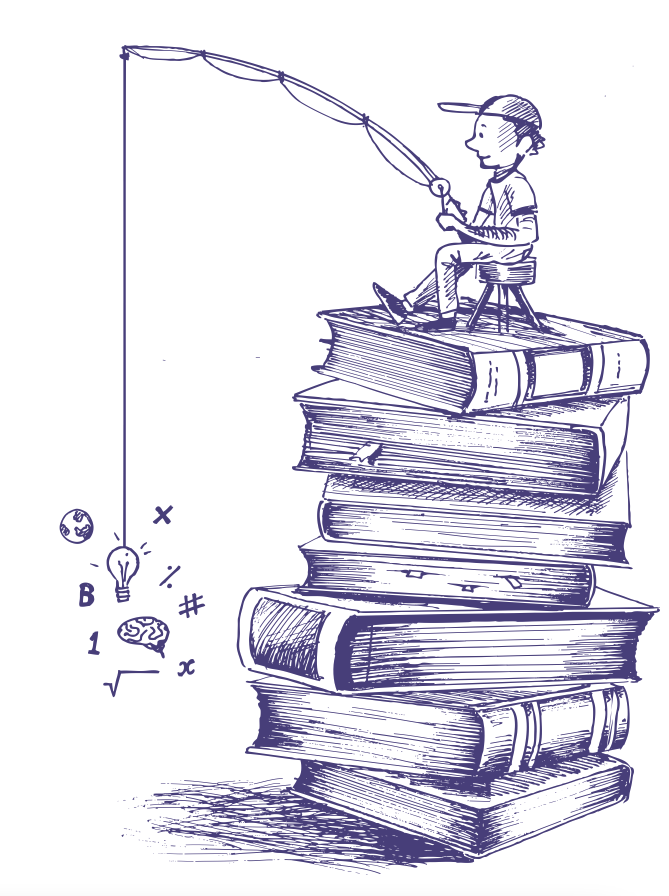

At its core, Natural Language Processing (NLP) is the scientific art of teaching machines to understand human language as naturally as it is spoken or written. It is a multidisciplinary field at the intersection of computer science, artificial intelligence, and linguistics, aiming to bridge the gap between human communication and computer understanding. With the power to parse, interpret, and even generate human language, NLP allows machines to perform a variety of tasks that were once thought to be uniquely human. From literature and scientific publications to tweets and patient feedback comments, NLP algorithms can help us explore the intricacies of human language, extracting meaning, sentiment, intent, and recurring themes.

In the context of public health & health policy, NLP is actively influencing how we monitor and respond to community health needs and emergent public health issues.

For instance, by analyzing vast amounts of data from online news, social media, and health forums, NLP facilitates real-time digital public health surveillance, quickly identifying potential outbreaks and public sentiment toward health interventions. This capability is also critical for early warning systems, allowing for rapid response to health crises such as pandemics or natural disasters. NLP-powered tools are also pivotal in analyzing health campaigns, public attitudes towards vaccination, and understanding barriers to healthcare access, thereby shaping more effective public health strategies.

When applied to Electronic Health Records (EHRs), NLP transforms the unstructured text of clinical notes into structured, actionable data. Physicians' observations, patient histories, and treatment plans recorded in EHRs become a rich source for insights, aiding in diagnosis, patient care, and medical research. These narratives are read and understood through NLP, enabling the extraction of critical information that supports clinical decision-making and personalized healthcare.

For those interested in learning additional NLP methods (beyond the basics covered in this course), the [NLTK textbook](https://www.nltk.org/book/) is a valuable resource. In this tutorial, we are working with a CSV file of text data, if you intend to do NLP analyses in your career, you may want to familiarize yourself with APIs to access text data in real time (e.g., PubMed E-utilities and ArXIV APIs for accessing literature, GDELT API for international news articles)


<hr>

<font color='#2a9d8f' size=5>Decoding Public Opinion: Sentiment Analysis of COVID-19 Vaccine Discourse on Twitter</font>

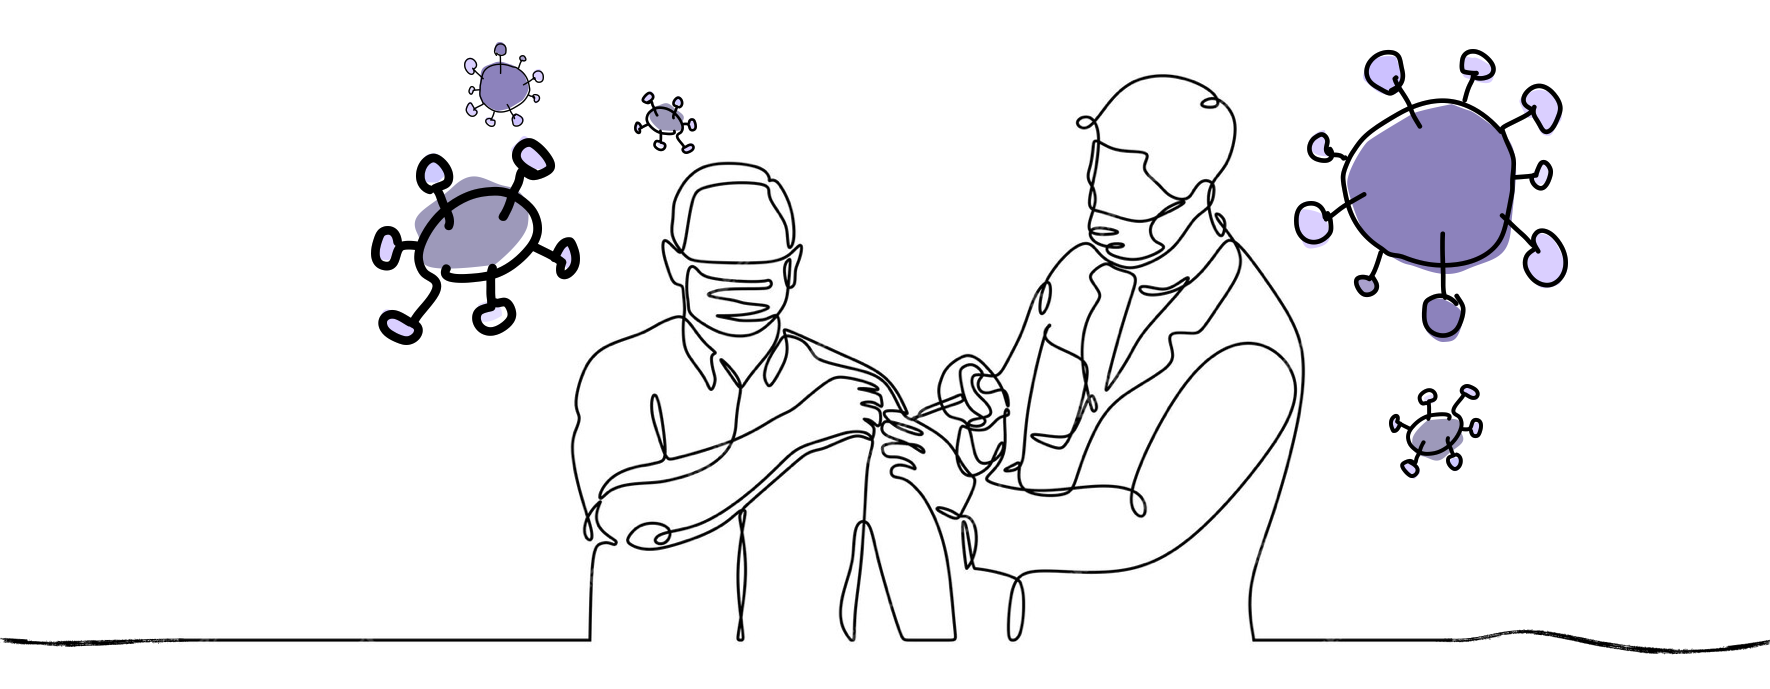




This dataset represents a focused snapshot of public sentiment during a critical period of the COVID-19 pandemic, where discussions around vaccines were prevalent on social media platforms such as Twitter. It captures the nuances of opinions, beliefs, and emotions expressed by individuals in reaction to the emerging information about COVID-19 vaccines. The dataset comprises tweet timestamps, user handles, the content of tweets, and a preliminary sentiment categorization.

Using this dataset for sentiment analysis is particularly important in a public health crisis. The classification of sentiments associated with tweets can provide rapid and actionable insights into the public's reception of vaccine rollouts, the spread of misinformation, and the level of awareness about vaccines. It can aid public health officials in understanding the effectiveness of communication strategies, detecting areas of skepticism, and adjusting outreach efforts accordingly.

During the COVID-19 pandemic, sentiment analysis has become even more pivotal. For example, research has shown that positive sentiment towards vaccines on social media is correlated with higher vaccination rates. The Centers for Disease Control and Prevention (CDC) reported that increasing vaccination coverage helps reduce the spread of the virus, underscoring the importance of positive public sentiment in achieving herd immunity. Conversely, negative sentiments and misinformation can lead to vaccine hesitancy, which the World Health Organization (WHO) has identified as a significant threat to global health. Given this context, it is clear that analyzing and understanding the public's views on public health crises is critical, as it has a direct effect on shaping public health policies and their success.

Here are the main variables of the dataset.

| Column Name | Data Type | Description                                                  |
|-------------|-----------|--------------------------------------------------------------|
| date        | datetime  | The date and time when the tweet was posted.                 |
| username    | string    | The username of the account that posted the tweet.           |
| tweet       | string    | The content of the original tweet.         |
| Emotion     | string    | The labeled emotion of the tweet (Neutral, Positive, or Negative).|


<font color='#2a9d8f' size=5>Importing Packages and Loading Data</font>

First-up, let's install and import our necessary packages for this tutorial

In [ ]:
# run the line below if you don't have these packages installed
# you can comment out this line after installing
!pip install -q contractions nltk gensim
!pip install numpy
#the '-q' can be removed, it just supresses the outputs from these package installations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
# Import key packages for data processing and NLP

import pandas as pd  # Library for handling structured data (e.g., DataFrames) efficiently

# Import the necessary libraries for text preprocessing
import contractions  # Allows us to handle text contractions (e.g., "can't" -> "cannot")
import re  # Used for finding and replacing text patterns (e.g., removing special characters)
from datetime import datetime  # Provides functions for handling date and time operations

# Import NLTK (Natural Language Toolkit) for text tokenization
import nltk
from nltk.tokenize import word_tokenize  # Tokenizes text into individual words
nltk.download('punkt')  # Downloads the tokenizer model which we'll be using
nltk.download('punkt_tab')

# Import the 'stopwords' corpus from NLTK (Natural Language Toolkit)
from nltk.corpus import stopwords
nltk.download('stopwords')  # Downloads the predefined list of common stopwords from NLTK.

# WordCloud for visualizing the frequency of words in text data
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Library for plotting and visualization

# Libraries for lemmatization (reducing words to their base form)
from nltk.stem import WordNetLemmatizer  # Performs lemmatization
from nltk.corpus import wordnet  # Provides a lexical database for lemmatization
nltk.download('averaged_perceptron_tagger')  # Downloads the model for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')  # Downloads the WordNet lexical database

# Libraries for word embeddings (vector representations of words)
  # Getting our pre-trained word embedding models
import numpy as np  # Numerical computing library for handling arrays and matrices
import gensim.downloader as api
# package to handle warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#Use this if you are running the code on Colab
from google.colab import files
import io

# uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
#df = pd.read_csv(io.BytesIO(uploaded['covid_vaccine.csv']), encoding='ISO-8859-1')
df = pd.read_csv("/content/drive/MyDrive/dataset/Papers.csv")

# Select specific columns ('date', 'username', 'tweet', and 'Emotion') from the DataFrame
#df = df[['title', 'abstract', 'discussion']]
#add a new column to concat all three columns(Title,Abstract , Discussion)
df["text"] = df[["Title", "Abstract", "Discussion"]].apply(lambda x: ' '.join(x.dropna()), axis=1)
# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,Title,Abstract,Discussion,text
0,Machine Learning Prediction Models for Gestati...,Background\nGestational diabetes mellitus (GDM...,Principal Findings\nThis study was a pilot met...,Machine Learning Prediction Models for Gestati...
1,Environmental chemical exposure dynamics and m...,Background\nWith dramatically increasing preva...,"With dramatically increasing prevalence, diabe...",Environmental chemical exposure dynamics and m...
2,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,Prediction of Type 2 Diabetes Based on Machine...
3,Data-driven modeling and prediction of blood g...,Background\nDiabetes mellitus (DM) is a metabo...,"5.1. Principal findings\nRecently, machine lea...",Data-driven modeling and prediction of blood g...
4,A Novel Diabetes Healthcare Disease Prediction...,Diabetes is a chronic disease that continues t...,ML technique is considered valuable in diagnos...,A Novel Diabetes Healthcare Disease Prediction...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


When processing text data, it is essential to ensure that the text is correctly encoded and free of any characters that may have been incorrectly interpreted or displayed due to encoding issues. In the example provided:

`I¡¯d rather contract COVID-19 than get the vac...`

The sequence `¡¯` is likely meant to represent an apostrophe in the contraction "I'd" (I would). However, due to an encoding mismatch, the apostrophe is displayed as `¡¯`. This can lead to problems such as:

- **Incorrect Text Analysis**: NLP algorithms may treat `I¡¯d` as a single, unique word rather than the intended contraction "I'd", which could skew text analysis results.
- **Search and Match Issues**: Searching the text for common words or phrases may fail because the unusual characters disrupt the expected patterns.
- **User Experience**: For any application that presents this text to users, such misencoding can be confusing and give an impression of poor data quality.

By cleaning the text and replacing `¡¯` with the correct apostrophe, you can avoid these issues and ensure that the text is processed accurately for analysis, searching, or display purposes.

In [ ]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    # Add additional replacements here if there are other encoding issues
    return text

# Apply the cleaning function to the 'tweet' column of the DataFrame.
df['tweet'] = df['tweet'].apply(clean_encoding)
df.head()

KeyError: 'tweet'

<font color='#2a9d8f' size=5>Handling Text Contractions in Preprocessing</font>

Handling contractions is an important step in text preprocessing, especially for English language data. Contractions are words or combinations of words that are shortened by dropping letters and replacing them with an apostrophe, like "I'm" for "I am" or "you're" for "you are".

In many NLP tasks, especially those involving sentiment analysis, expanding these contractions is beneficial. This expansion makes the text more standardized and easier for algorithms to understand. For example, expanding "I'm" to "I am" makes it clear that the sentence is in the first person and present tense, which might be important for the analysis.

Here is how you can handle contractions:

1. **Use a Pre-built Library**: Python libraries like `contractions` can automatically handle common English contractions. You can install it via pip (`pip install contractions`) and then use it to replace contractions in your text. We already installed and imported this package at the start of the tutorial.

2. **Manually Define a Mapping**: If you prefer not to use an external library, or if you have specific contraction cases you want to handle, you can manually define a dictionary of contractions and their expansions and use it to replace contractions in your text.

Here is a brief example using the `contractions` library:

```python
import contractions

# Example of expanding contractions
expanded_tweet = contractions.fix("I'm feeling good about the vaccine's effectiveness.")
print(expanded_tweet)  # Output: "I am feeling good about the vaccine is effectiveness."
```
This approach will ensure that your text data is more uniform and easier to analyze, especially when dealing with informal language often found in social media posts like tweets.

In [ ]:
# Expand contractions in the 'tweet' column
df['text'] = df['text'].apply(lambda x: contractions.fix(x))
df.head()

,Title,Abstract,Discussion,text
0,Machine Learning Prediction Models for Gestati...,Background\nGestational diabetes mellitus (GDM...,Principal Findings\nThis study was a pilot met...,Machine Learning Prediction Models for Gestati...
1,Environmental chemical exposure dynamics and m...,Background\nWith dramatically increasing preva...,"With dramatically increasing prevalence, diabe...",Environmental chemical exposure dynamics and m...
2,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,Prediction of Type 2 Diabetes Based on Machine...
3,Data-driven modeling and prediction of blood g...,Background\nDiabetes mellitus (DM) is a metabo...,"5.1. Principal findings\nRecently, machine lea...",Data-driven modeling and prediction of blood g...
4,A Novel Diabetes Healthcare Disease Prediction...,Diabetes is a chronic disease that continues t...,ML technique is considered valuable in diagnos...,A Novel Diabetes Healthcare Disease Prediction...


**Note**: If we had not corrected the misencoded characters in the previous step, we would not be able to effectively handle contractions in the text. The presence of incorrect characters like `¡¯` in place of an apostrophe would prevent text processing algorithms from recognizing and properly managing contractions. For example, "I¡¯d" would not be identified as the contraction "I'd", and therefore would not be expanded to "I would". This highlights the **order** of the tasks that need to be performed when it comes to text data preprocessing.

<hr>

<font color='#2a9d8f' size=5>Text Data Standardization</font>


1. **Converting the date column to datetime format**:
   - The purpose of this step is to ensure that the date and time information in the dataset is recognized by the computer in a standardized format that is universally understood. By converting strings that represent date and time into a datetime object, we enable the computer to perform operations that are specific to dates and times, such as sorting based on time or filtering entries within a certain date range.

2. **Lowercasing all text in the 'tweet' column**:
   - The goal here is to achieve consistency in the dataset by converting all the text to lowercase. This is important because the sentiment analysis algorithm might otherwise treat the same words with different cases as distinct, leading to inaccuracies in the analysis.
   - The line `df['tweet'] = df['tweet'].str.lower()` is used to convert all the text in the 'tweet' column of the DataFrame 'df' to lowercase.
   - `.str` is used to access string methods and operations on the elements within the selected column.
   - `.lower()` is a string method that converts all the characters in a string to lowercase.

3. **Removing URLs from the tweets**:
   - URLs are typically irrelevant to the sentiment expressed in the tweet and can be distracting to the analysis. The regular expression `r'http\S+'` is used to find and remove these. Here, `http` is the literal string that URLs usually start with, `\S+` matches a sequence of non-whitespace characters (which in the context of URLs, can be anything until a space is encountered). This expression matches the whole URL, and we replace it with an empty string, effectively removing it from the tweet.

4. **Removing Twitter handles**:
   - Twitter handles (e.g., `@username`) are identifiers and do not contribute to sentiment. The regular expression `r'@\w+'` matches these handles. The `@` is the literal character we are looking for, and `\w+` matches one or more word characters (letters, digits, or underscores) that come after it. This matches the entire handle, which we then remove.

5. **Removing special characters and numbers**:
   - Special characters and numbers generally do not carry sentiment and can be removed to simplify the analysis. The regular expression `r'[^A-Za-z\s]'` is used for this purpose. The `[^ ]` denotes a set of characters we do not want (the caret `^` means "not" in this context). Inside the brackets, `A-Za-z` specifies any uppercase or lowercase letter, and `\s` allows for any whitespace characters (like spaces or tabs) to be retained. So, this regular expression matches any character that is not a letter or whitespace and removes it.

6. **Correcting the spelling of "Neutral" in the 'Emotion' column**:
   - Ensuring that categories are labeled correctly is important for accurate analysis. There is no regular expression used in this step. Instead, we simply replace the misspelled or varied spellings of "Neutral" with the correct one to maintain consistency across the dataset.

These steps aim to create a dataset that focuses only on the text that is likely to carry sentiment, making it easier for the sentiment analysis algorithm to operate effectively and accurately. Regular expressions are like search patterns that we define to find specific sequences of characters within text, and they are a powerful tool for text processing and data cleaning.

In [ ]:
# Let's perform some basic data cleaning tasks such as:
# - Converting the date column to datetime
# - Lowercasing the tweet texts
# - Removing URLs
# - Removing Twitter handles
# - Removing special characters and numbers
# - Correcting the spelling of "Neutral" in Emotion column

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)

# Function to remove Twitter handles
def remove_handle(text):
    return re.sub(r'@\w+', '', text)

def remove_cite(text):
    clean_text = re.sub(r"\[\d+\]", "", text)
    return clean_text

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(remove_url)
df['text'] = df['text'].apply(remove_cite)
df['text'] = df['text'].apply(remove_special_characters)

df.head()

,Title,Abstract,Discussion,text
0,Machine Learning Prediction Models for Gestati...,Background\nGestational diabetes mellitus (GDM...,Principal Findings\nThis study was a pilot met...,machine learning prediction models for gestati...
1,Environmental chemical exposure dynamics and m...,Background\nWith dramatically increasing preva...,"With dramatically increasing prevalence, diabe...",environmental chemical exposure dynamics and m...
2,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,prediction of type diabetes based on machine ...
3,Data-driven modeling and prediction of blood g...,Background\nDiabetes mellitus (DM) is a metabo...,"5.1. Principal findings\nRecently, machine lea...",datadriven modeling and prediction of blood gl...
4,A Novel Diabetes Healthcare Disease Prediction...,Diabetes is a chronic disease that continues t...,ML technique is considered valuable in diagnos...,a novel diabetes healthcare disease prediction...


<font color='#2a9d8f' size=5>Tokenization</font>

Tokenization is a foundational step in most natural language processing tasks. It is the process of converting a sequence of characters into a sequence of tokens (words, phrases, symbols, or other meaningful elements called lexemes).

Here is a snapshot of how tokenization works

```python
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Example of tokenization
tokenized_text = word_tokenize("I am feeling good about the vaccine is effectiveness")
print(tokenized_text)  # Output: ['I', 'am', 'feeling', 'good', 'about', 'the', 'vaccine', 'is', 'effectiveness']
```

In sentiment analysis, tokenization allows us to break down the text into individual elements that can be analyzed to determine the sentiment. This is crucial because the meaning of text often comes down to the words used and their context.

1. **Create a Tokenization Function**: We can use the `word_tokenize` function from `nltk` to tokenize the text into words.

2. **Apply Function to DataFrame and Create a new "tokens" column**: We then apply this function to our DataFrame to create a new column that contains the tokenized text.


In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

In [ ]:
df['tokens'] = df['text'].apply(tokenize_text)
df.head()

,Title,Abstract,Discussion,text,tokens
0,Machine Learning Prediction Models for Gestati...,Background\nGestational diabetes mellitus (GDM...,Principal Findings\nThis study was a pilot met...,machine learning prediction models for gestati...,"[machine, learning, prediction, models, for, g..."
1,Environmental chemical exposure dynamics and m...,Background\nWith dramatically increasing preva...,"With dramatically increasing prevalence, diabe...",environmental chemical exposure dynamics and m...,"[environmental, chemical, exposure, dynamics, ..."
2,Prediction of Type 2 Diabetes Based on Machine...,Prediction of type 2 diabetes (T2D) occurrence...,This study proposed a machine learning model t...,prediction of type diabetes based on machine ...,"[prediction, of, type, diabetes, based, on, ma..."
3,Data-driven modeling and prediction of blood g...,Background\nDiabetes mellitus (DM) is a metabo...,"5.1. Principal findings\nRecently, machine lea...",datadriven modeling and prediction of blood gl...,"[datadriven, modeling, and, prediction, of, bl..."
4,A Novel Diabetes Healthcare Disease Prediction...,Diabetes is a chronic disease that continues t...,ML technique is considered valuable in diagnos...,a novel diabetes healthcare disease prediction...,"[a, novel, diabetes, healthcare, disease, pred..."


The result of this operation is that each row of the DataFrame will have a new list of tokens corresponding to the 'tweet' text of that row. These tokens are typically words, but depending on the tokenization function used, they could also include punctuation or other characters.

<hr>

<font color='#2a9d8f' size=5>Stop Words</font>

Stop words are words which are filtered out before or after processing of text. When building the vocabulary of known words for a language model, it is a common practice to exclude words that carry very little informative power, typically because they occur very frequently in the language. These include words like "the", "is", "in", and "and" in English. They are called stop words because they are often removed, or "stopped", from the text before performing natural language processing tasks.

#### Types of Stop Words

1. **General Stop Words**: These are the words that are commonly used in the language and do not contribute much to the meaning of a sentence. They can be safely ignored without sacrificing the meaning of the information conveyed by the text. The general stop words for English are provided by libraries like NLTK and spaCy and include words such as "a", "and", "the", "in", etc.

2. **Context-Sensitive Stop Words**: These are words that might be considered stop words only in certain contexts. For example, in a collection of documents about programming, words like "variable" or "function" might be so common that they do not carry useful distinguishing information. These are not part of standard stop word lists and are usually custom-defined based on the specific dataset or domain of text being analyzed.

Removing stop words is a common preprocessing step because it can help reduce the amount of data that needs to be processed, and it can also help algorithms focus on the words that carry more meaning.


In [ ]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['text', 'tokens', 'tokens_no_stop']].head()


,text,tokens,tokens_no_stop
0,machine learning prediction models for gestati...,"[machine, learning, prediction, models, for, g...","[machine, learning, prediction, models, gestat..."
1,environmental chemical exposure dynamics and m...,"[environmental, chemical, exposure, dynamics, ...","[environmental, chemical, exposure, dynamics, ..."
2,prediction of type diabetes based on machine ...,"[prediction, of, type, diabetes, based, on, ma...","[prediction, type, diabetes, based, machine, l..."
3,datadriven modeling and prediction of blood gl...,"[datadriven, modeling, and, prediction, of, bl...","[datadriven, modeling, prediction, blood, gluc..."
4,a novel diabetes healthcare disease prediction...,"[a, novel, diabetes, healthcare, disease, pred...","[novel, diabetes, healthcare, disease, predict..."


The removal of stopwords from the tokenized tweets has led to a more concise and focused set of words that are likely more relevant for further text analysis or natural language processing tasks. The words removed were typically common English words ("what", "do", "you", "to", "are", "and", "if", "than", "the") that often do not contribute to the unique meaning of the text. The remaining tokens, which include nouns, verbs, and adjectives specific to the content of the tweets (like "lighthouse", "exactly", "mean", "investigate", "sharon", "kirkey", "experts", "explain", "skip", "covid", "vaccines", "contract"), are more informative and can be used to better understand the main topics or sentiments expressed in the tweets.

<hr>

Context-sensitive stop words are words that are not generally classified as stop words in a language but become irrelevant or too common within a specific context or dataset, offering little to no unique information. In the context of COVID-19 vaccines, such words might be directly related to the common terminology of the pandemic and vaccination efforts. Words like "COVID-19", "vaccine", "vaccination", "coronavirus", and similar terms could be considered context-sensitive stop words for your dataset, as they might be overly prevalent and not useful for distinguishing between different sentiments or topics.

To remove these context-sensitive stop words, you would first define a list of these words and then modify your stop word removal function to include this list. Here's an example of how you can do it:

In [ ]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['diabetes','machine','learning', 'artificial','intelligence','gestational','mellitus','prediction','blood','disease','healthcare','models','model','using','ml','et','al','method','methods','studies','study','predict'])

# English stop words
stop_words_set = set(stopwords.words('english')) # At the beginning of the tutorial, we downloaded a predefined set of common stopwords from NLTK /
# in this line, we're getting this predefined set of english stop words.

# Here we will remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words /
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['text', 'tokens', 'tokens_no_stop_context']].head()


,text,tokens,tokens_no_stop_context
0,machine learning prediction models for gestati...,"[machine, learning, prediction, models, for, g...","[metaanalysis, background, gdm, common, endocr..."
1,environmental chemical exposure dynamics and m...,"[environmental, chemical, exposure, dynamics, ...","[environmental, chemical, exposure, dynamics, ..."
2,prediction of type diabetes based on machine ...,"[prediction, of, type, diabetes, based, on, ma...","[type, based, algorithm, type, td, occurrence,..."
3,datadriven modeling and prediction of blood gl...,"[datadriven, modeling, and, prediction, of, bl...","[datadriven, modeling, glucose, dynamics, appl..."
4,a novel diabetes healthcare disease prediction...,"[a, novel, diabetes, healthcare, disease, pred...","[novel, framework, techniques, chronic, contin..."


Make sure to tailor the list of context-sensitive stop words to fit your specific dataset and analytical goals, as the relevance of certain terms can vary depending on what you are trying to achieve with your analysis.

The following code snippet will generate a **word cloud visualizing** the most frequent words in our `tokens_no_stop_context` column, with a 'magma' color palette. The word cloud will visually represent the most prominent words in our dataset after removing stop words and context-sensitive words. ​

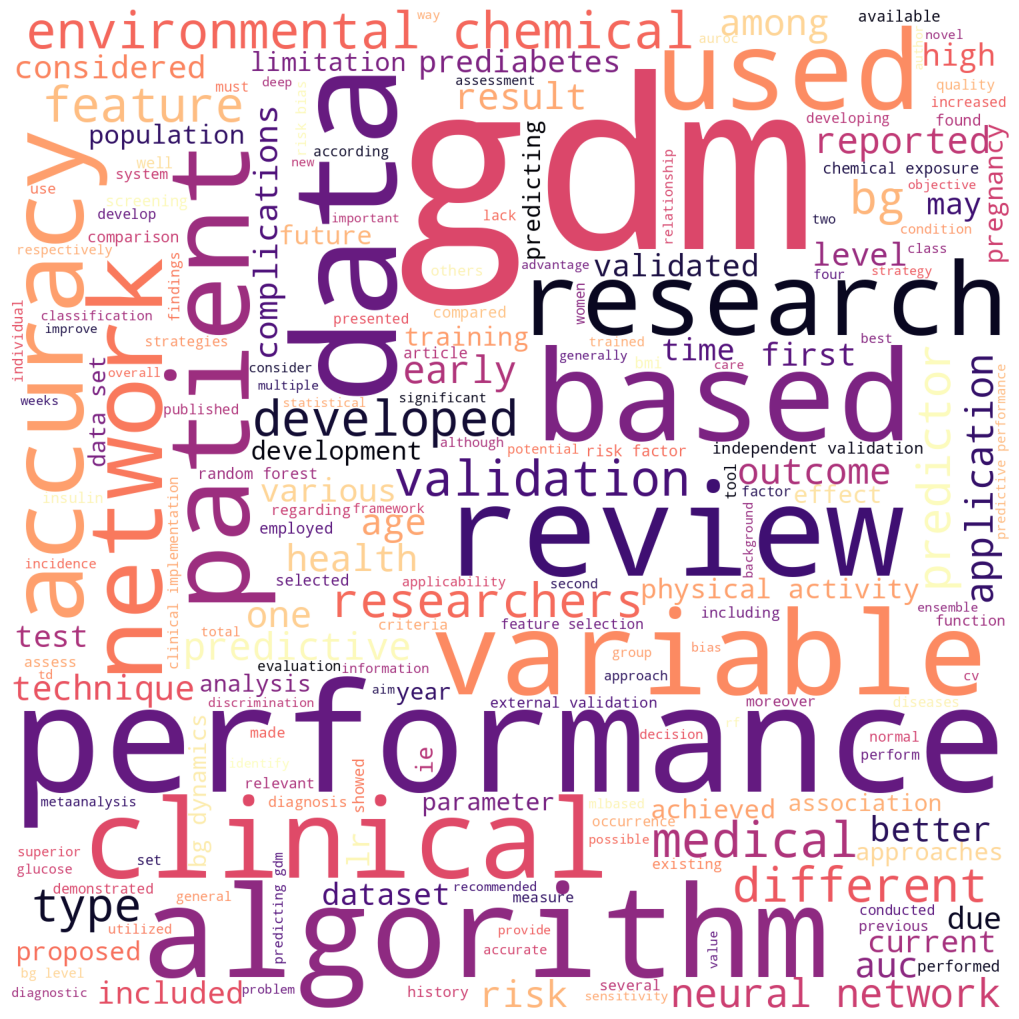

In [ ]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# You can remove .head(5000) if you want to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 1500, height = 1500,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

<hr>

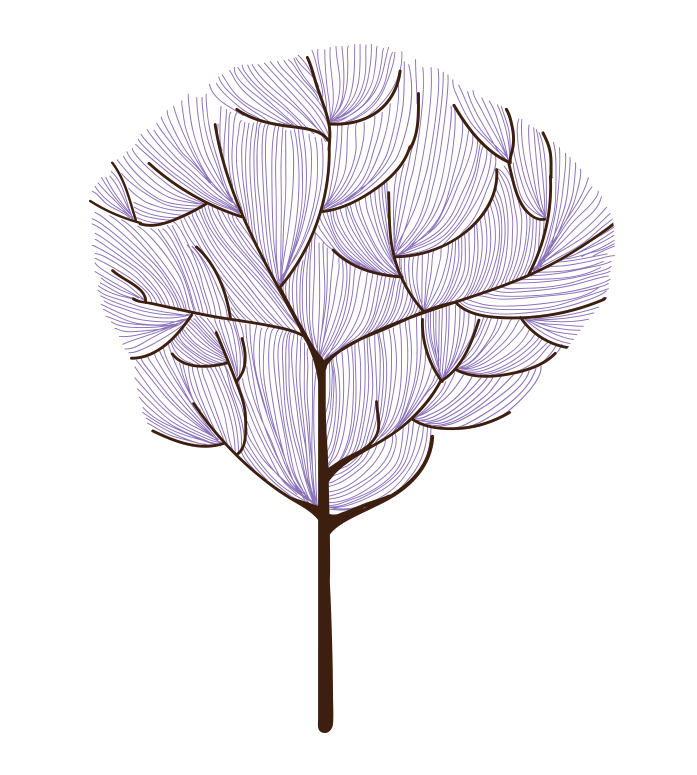

<font color='#2a9d8f' size=5>Lemmatization</font>

Lemmatization is a process in natural language processing where words are reduced to their base or root form. Unlike stemming, which often simply chops off word endings, lemmatization considers the context and converts the word to its meaningful base form, which is known as a lemma. For example, the lemma of "am", "are", and "is" is "be", and the lemma of "mice" is "mouse".

This process is important in NLP as it helps in reducing the morphological complexity of words, bringing them down to their base or dictionary form. It aids in standardizing words with similar meanings so that they can be analyzed as a single item, improving the performance of various NLP tasks like text classification, sentiment analysis, and topic modeling.

#### Lemmatization in Python
To perform lemmatization in Python, the Natural Language Toolkit (NLTK) provides a `WordNetLemmatizer` class. At the beginning of the tutorial, we downloaded WordNet data via NLTK. WordNet is a large lexical database of English where nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. In the following code:

1. We first instantiate `WordNetLemmatizer`.
2. We define a function `get_wordnet_pos` to map NLTK's part-of-speech tags to the format required by the lemmatizer. This step is important as lemmatization depends on a word's part-of-speech.
3. We define `lemmatize_text` which applies the lemmatizer to each token.
4. Finally, we apply this function to our DataFrame to get the lemmatized tokens.

This process results in tokens that are the base or dictionary form of the words, which is beneficial for consistent text analysis.

In [ ]:
# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

In [ ]:
from nltk.stem import PorterStemmer

# Instantiate the stemmer
stemmer = PorterStemmer()

# Function for stemming
def stem_text(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the tokens
df['stemmed'] = df['tokens_no_stop_context'].apply(stem_text)

# Display the DataFrame

In [ ]:
# Display the DataFrame
df[[ 'text', 'tokens_no_stop_context', 'lemmatized']].head()

,text,tokens_no_stop_context,lemmatized
0,machine learning prediction models for gestati...,"[metaanalysis, background, gdm, common, endocr...","[metaanalysis, background, gdm, common, endocr..."
1,environmental chemical exposure dynamics and m...,"[environmental, chemical, exposure, dynamics, ...","[environmental, chemical, exposure, dynamic, l..."
2,prediction of type diabetes based on machine ...,"[type, based, algorithm, type, td, occurrence,...","[type, base, algorithm, type, td, occurrence, ..."
3,datadriven modeling and prediction of blood gl...,"[datadriven, modeling, glucose, dynamics, appl...","[datadriven, model, glucose, dynamic, applicat..."
4,a novel diabetes healthcare disease prediction...,"[novel, framework, techniques, chronic, contin...","[novel, framework, technique, chronic, continu..."


### Explanation of the Results: POS Tags and Lemmatization

When we analyze text in NLP, we often break down sentences into individual words called `tokens`. Each token can be a word like "experts" or "explain". To understand these words better, we often need to know their roles in the sentence, like whether a word is a noun (a person, place, thing, or idea), a verb (an action or state of being), an adjective (describing a noun), etc. This is where Part-Of-Speech (POS) tagging comes in.

#### **Part-Of-Speech (POS) Tags:**

Each word in a sentence can play different roles (such as nouns, verbs, adjectives, etc.), and POS tags help identify these roles. The POS tags are typically more specific (e.g., "NNS" for plural nouns, "VBP" for present tense verbs), but in this case, we are simplifying by only considering the first letter of the POS tag to assign a general word type. For example:

1. **Nouns (N):** Any POS tag starting with 'N' (e.g., "NNS" for plural nouns, "NN" for singular nouns) is categorized as a noun.
2. **Verbs (V):** POS tags starting with 'V' (e.g., "VBP" for present tense verbs, "VBZ" for third-person singular present verbs) indicate verbs.
3. **Adjectives (J):** If the POS tag starts with 'J', it indicates an adjective (e.g., "JJ" for a simple adjective).
4. **Adverbs (R):** POS tags that start with 'R' represent adverbs (e.g., "RB" for adverbs).

Why is POS tagging important for lemmatization (getting the base forms of our words)? Well, without a POS tag, the lemmatizer may incorrectly reduce a word to the wrong base form. For instance, `organization` is a noun, wheras `organized` is a verb.

The correct lemmatization, recognizing the part of speech, would be:
<br><br> <!-- Adds space above the table -->
<table>
  <tr>
    <th><span style="font-size:18px">Original Word</span></th>
    <th><span style="font-size:18px">Lemmatized Form</span></th>
  </tr>
  <tr>
    <td><span style="font-size:16px">organization (noun)</span></td>
    <td><span style="font-size:16px">organization (remains unchanged)</span></td>
  </tr>
  <tr>
    <td><span style="font-size:16px">organized (verb)</span></td>
    <td><span style="font-size:16px">organize (reduced to base form)</span></td>
  </tr>
</table>
<br>

Without accurate POS tagging, the lemmatizer might incorrectly transform organization into organize (incorrect) instead of leaving it as organization.


#### **Lemmatization:**

Once we know the role each word plays in a sentence, we can start the process of lemmatization. Lemmatization is about finding the base or dictionary form of a word.
For example:

1. **'experts' to 'expert'**: Since "experts" is a noun, its base form is "expert"-the singular form.
2. **'explain' stays 'explain'**: As "explain" is already in its base form (a verb), it does not change.
3. **'happens' to 'happen'**: The word "happens" is a verb. Its base form is "happen" (to occur or take place).
4. **'skip' and 'second' stay the same**: As they are used as adjectives here, they remain unchanged in the lemmatization process.

<hr>

<font color='#2a9d8f' size=5>Stemming: An Alternative for Lemmatization</font>


It is important to note that stemming and lemmatization **are often alternative steps in text preprocessing, not sequential steps**. You would generally choose one or the other based on your specific needs.

Stemming is a little more crude than lemmatization, as it simply chops off word endings based on common prefixes, suffixes, etc., *without understanding the context of the words*. For example, `stemming` would reduce the words to their root form, resulting in non-standard words that may not be valid (e.g., "running" → "run", "better" → "bet", "organization" → "organ", "happily" →  "happi"). `Lemmatization`, on the other hand, considers the word's meaning and context, ensuring that the resulting base form is a valid word (e.g., "running" → "run" or "better" → "good", "organization" → "organization", "happily" → "happy").

The primary advantage of stemming is its simplicity and speed; it is generally faster than lemmatization. However, this comes at the cost of accuracy and might sometimes produce non-existent or incorrect words, known as over-stemming or under-stemming.

#### Stemming in Python
In Python, the NLTK library provides several stemmers, with the most common being the Porter Stemmer. While we won't include a code cell for stemming, here is an example of how we can apply stemming:

```python
from nltk.stem import PorterStemmer

# Instantiate the stemmer
stemmer = PorterStemmer()

# Function for stemming
def stem_text(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the tokens
df['stemmed'] = df['tokens_no_stop_context'].apply(stem_text)

# Display the DataFrame
print(df[['date', 'username', 'tweet', 'Emotion', 'stemmed']])
```

In this example, we define a `stem_text` function that applies the Porter Stemmer to each token in our tokens list. We then apply this function to the DataFrame.

### Takeaways
- If you do NLP analyses, you'll need to choose between lemmatization and stemming for pre-processing your tokens (aka. words).
- **Lemmatization** is generally preferred when the accuracy of the text analysis is crucial. It is more suitable for tasks where the context and meaning of the words are important.
- **Stemming** is useful when you need faster processing and are dealing with large datasets where the slightly lower accuracy of stemming will not have a significant impact on the final results.

In many practical applications, you will choose either stemming or lemmatization, depending on your specific needs and constraints. If you have already performed lemmatization, you may not need to do stemming unless you have a specific reason to compare the results of both methods.

Having completed additional data cleaning and preprocessing steps, let's now revisit the dataset and generate an updated word cloud. This visualization will provide us with a fresh perspective on the most prominent words in our refined dataset.

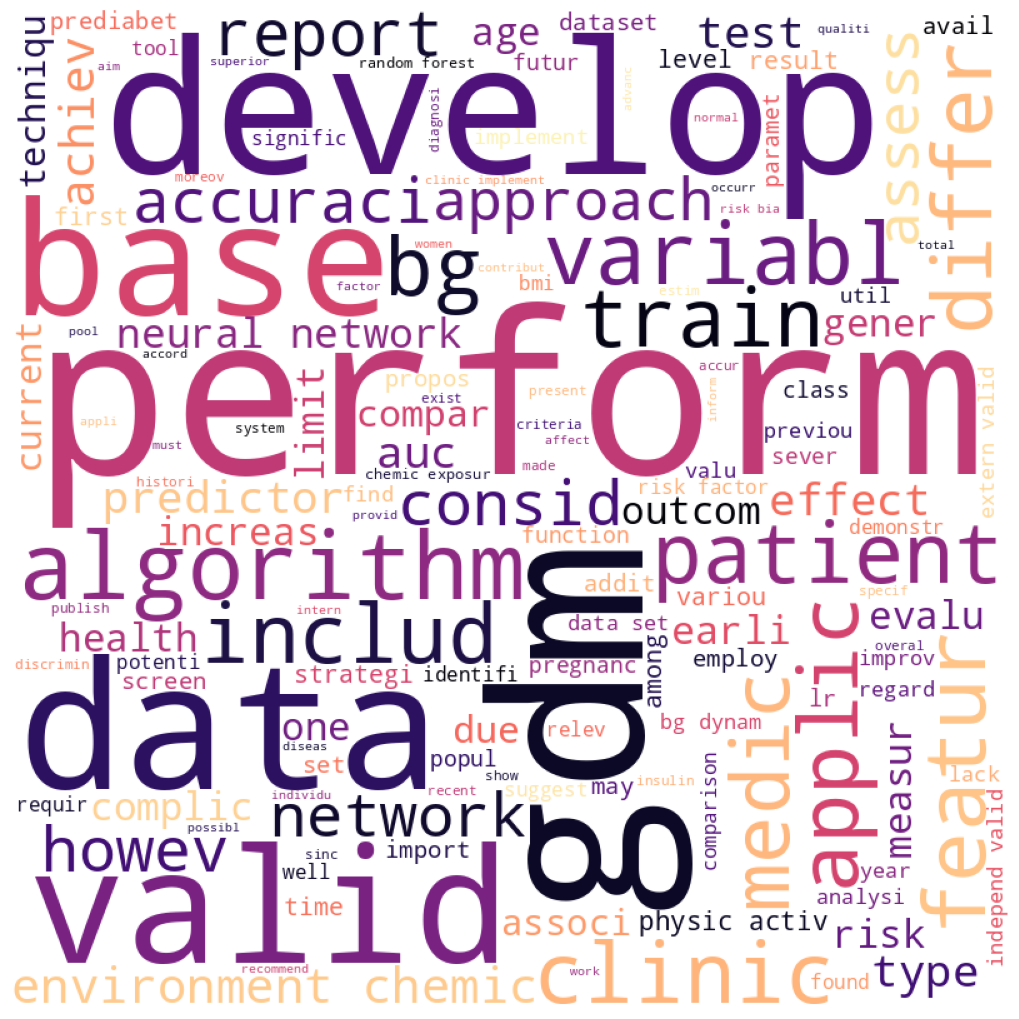

In [ ]:
# Combine all tokens from the 'lemmatized' column into a single list
#context sensitive words
context_sensitive_stop_words.add('predict')
context_sensitive_stop_words.add('research')
context_sensitive_stop_words.add('conduct')
context_sensitive_stop_words.add('ie')
context_sensitive_stop_words.add('increase')
context_sensitive_stop_words.add('high')
context_sensitive_stop_words.add('review')
context_sensitive_stop_words.add('use')
context_sensitive_stop_words.add('better')
context_sensitive_stop_words.add('select')
df['final'] = df['stemmed'].apply(remove_context_sensitive_stop_words)
all_tokens = sum(df['final'].head(5000).tolist(), [])


# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

When comparing the two word clouds—one generated before lemmatization and the other after lemmatization—there are a few key differences and observations we can make:

1. **Word Forms**: In the pre-lemmatization word cloud, you may notice different forms of the same word. For example, "getting", "get", and "got" might all appear separately. In the post-lemmatization word cloud, these variations would be consolidated into a single lemma, such as "get," which can help to highlight the most important themes in the text more clearly.
2. **Frequency and Emphasis**: After lemmatization, the frequency of the root words will increase because multiple derived forms contribute to the count of the base word. This can lead to a change in the size and prominence of words in the word cloud, as common roots become more emphasized.
3. **Clarity**: The post-lemmatization word cloud typically offers a clearer picture of the central topics in the text data because it groups together different inflections of words. This can make it easier to identify key themes and topics at a glance.
4. **Noise Reduction**: Lemmatization helps to reduce noise by collapsing derivationally related words into their base form, making the word cloud less cluttered with variations of the same word.
5. **Common Themes**: Both word clouds might share common prominent terms that are central to the topic at hand (e.g. words related to COVID-19 and vaccines). However, the post-lemmatization cloud is likely to give these terms more weight due to the consolidation of various word forms.
6. **Insights into the Dataset**: By examining the differences between the two clouds, you can get insights into the preprocessing steps. For instance, if the post-lemmatization cloud shows a significant change in the prominence of certain terms, it can indicate that those terms had many different morphological forms in the original text.

In sentiment analysis, the post-lemmatization word cloud is generally more useful as it standardizes the vocabulary, thus providing a more accurate representation of sentiment and themes. It allows the sentiment classification model to focus on the semantic meaning of the words rather than their grammatical variations. This can potentially improve the performance of Machine Learning algorithms in classifying sentiments more effectively.

<hr>

<font color='#2a9d8f' size=5>Vectorization</font>


Machine learning algorithms work with numerical data, not raw text. Therefore, we need to transform our text into a format these algorithms can understand. This is where vectorization comes in. It involves converting text into a set of numerical features.

#### Common Vectorization Techniques

1. **Bag of Words (BoW)**: This is one of the simplest vectorization methods. It involves creating a vocabulary of all the unique words in your text data and then representing each document or tweet as a count vector. Each element of this vector corresponds to the number of times a word appears in the document.
2. **Term Frequency-Inverse Document Frequency (TF-IDF)**: This technique is similar to BoW but with an additional twist. Instead of just counting, it also considers how unique a word is across all documents (or tweets in our case). It gives higher weight to rare terms across the documents and lower weight to common terms.
3. **Word Embeddings (like Word2Vec, GloVe)**: This advanced method represents words in a dense vector space where similar words are close to each other. These vectors capture more contextual information than BoW or TF-IDF.

Let's start with a basic implementation of vectorization using TF-IDF. In this code, we first join the lemmatized tokens back into strings. Then, we use the `TfidfVectorizer` from `Scikit-learn` to convert these strings into a TF-IDF matrix. This matrix can be used as input for various machine learning models for tasks like classification.


In [ ]:
# Import the TfidfVectorizer class from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the 'lemmatized' column in the DataFrame to a single string per tweet.
# Each row contains a list of lemmatized words, so we join them into a single string for processing.
cleaned_texts = df['lemmatized'].apply(lambda x: ' '.join(x))

print("First 5 cleaned tweet texts (lemmatized):")
print(cleaned_texts.head())

# Initialize a TfidfVectorizer object. This vectorizer will transform the text data into TF-IDF features.
# TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic that reflects the importance of a word
# in a document in a collection or corpus.
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the cleaned texts and transform them into a TF-IDF-weighted document-term matrix.
# This step calculates the TF-IDF values for each word in each tweet and creates a sparse matrix, where
# each row represents a tweet and each column corresponds to a unique word from the corpus.
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

# 'tfidf_matrix' now contains the TF-IDF representation of the text data.
# This matrix can be used as input for various machine learning models for tasks like classification, clustering, etc.

First 5 cleaned tweet texts (lemmatized):
0    lighthouse exactly mean investigate mean tanza...
1    sharon kirkey firstdosefirst panel reassures c...
2                    expert explain happen skip second
3    three available wonder one good two join dr br...
4                            would rather contract get
Name: lemmatized, dtype: object


<hr>
<font color='#2a9d8f' size=5>Word Embeddings</font>

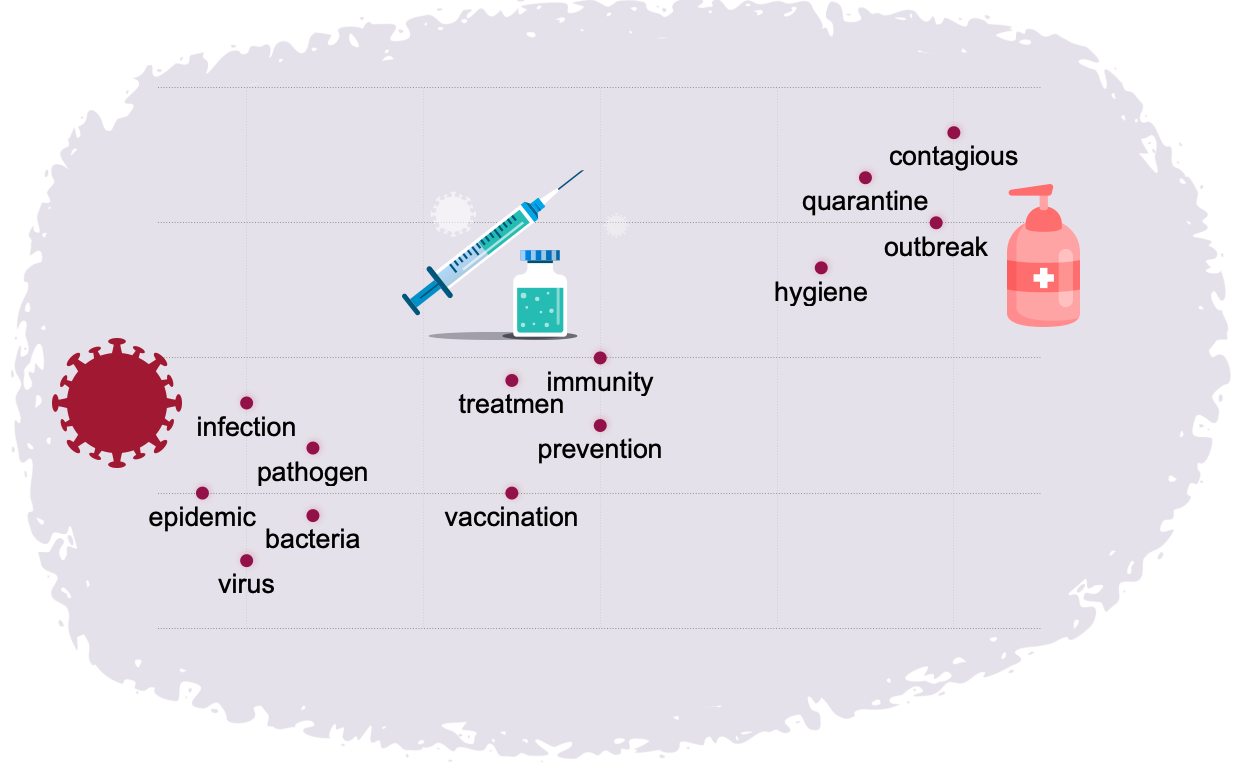

Word embeddings are a type of word representation that allows words with similar meanings to have a similar representation. They are a set of feature learning techniques in natural language processing where words or phrases from the vocabulary are mapped to vectors of real numbers, capturing the contextual and semantic information. Essentially, word embeddings are learned from the text and represent words as dense vectors in a continuous vector space.

#### Word2Vec
Word2Vec, developed by a team at Google, is a popular method to create word embeddings by using a two-layer neural network. It comes in two flavors: Continuous Bag of Words (CBOW) and Skip-gram. CBOW predicts a word given its context, while Skip-gram does the opposite and predicts the context given a word. Word2Vec captures the relationships between words in a way that preserves semantic relationships (e.g., king-man + woman ≈ queen).

#### GloVe
GloVe (Global Vectors for Word Representation), developed by Stanford, is another widely used method to create word embeddings. Unlike Word2Vec, which is based on local context information of words, GloVe creates word vectors by looking at the global word-word co-occurrence matrix from a corpus. The resulting embeddings reflect the probabilities that pairs of words appear together.

### Differences between Word2Vec and GloVe
- **Training Algorithm**: Word2Vec is trained with local context window data, whereas GloVe is trained on global word-word co-occurrence counts. This means GloVe can capture broader contexts over the whole corpus.
- **Semantic Relationships**: While both models capture semantic relationships, Word2Vec does so through local context, making it potentially better for syntax, whereas GloVe, through its global matrix, might capture more nuanced semantics.
- **Performance**: In practice, both models can perform similarly on tasks like word similarity, but they might exhibit different behaviors with different datasets or tasks.


### What is a  Local Context in our Dataset?

In the context of our dataset:

1. **Context Window in Tweets**: When applying Word2Vec to our tweets, the local context refers to the words surrounding a target word within each tweet. Suppose we set the context window size to 5. In this case, for any given word in a tweet, Word2Vec will consider two words before and two words after it as the local context. This window size can be adjusted depending on how closely we believe the meaning of a word is tied to its immediate neighbors.
2. **Example from a Tweet**: Let's take a hypothetical tweet: "Vaccines are crucial for stopping the pandemic". If 'crucial' is the target word and our window size is 3, the local context includes ['are', 'for', 'stopping']. The Word2Vec model will use this local context to learn the representation of 'crucial'.

3. **Implications for Learning Word Representations**:
    - **CBOW Approach**: If using CBOW, Word2Vec might predict 'crucial' from the surrounding words ['are', 'for', 'stopping'].
    - **Skip-gram Approach**: Conversely, with Skip-gram, it tries to predict the context words ['are', 'for', 'stopping'] from 'crucial'.

4. **Focusing on Immediate Relationships**: In our dataset of tweets about COVID-19 vaccines, local context will help capture how specific words are typically used in discussions about vaccines, pandemic, health guidelines, etc. For example, words like 'effective', 'safe', 'dose', and 'immune' will be understood in relation to their neighboring words.

5. **Understanding Sentiments and Topics**: This can be particularly useful for understanding sentiments or specific topics in your dataset. Words in the local context can reveal a lot about the stance of a tweet (e.g., supportive, critical, informative) concerning vaccines.

6. **Tweet-Specific Challenges**: Tweets are short and sometimes use informal or abbreviated language. In this case, local context becomes even more crucial, as each word's immediate surroundings can provide significant clues to its meaning or usage in that constrained space.

Both Word2Vec and Glove models are useful and have their own advantages. The choice between them often depends on your task's specific requirements and your dataset's nature.

In [ ]:
# Load pre-trained GloVe model
glove_model = api.load('glove-wiki-gigaword-100')  # GloVe model trained on Wikipedia 2014 + Gigaword 5

# Example function to vectorize a list of tokens using the GloVe model
def vectorize(tokens):
    # Filter out tokens not in the model's vocabulary
    tokens = [token for token in tokens if token in glove_model.key_to_index]

    # If no words in the tweet are in the model's vocabulary, return a zero vector
    if len(tokens) == 0:
        return np.zeros(glove_model.vector_size)

    # Compute the mean of the word vectors for the tokens
    word_vectors = [glove_model[token] for token in tokens]
    return np.mean(word_vectors, axis=0)

# Apply the vectorization to each row's tokens
df['embedding'] = df['lemmatized'].apply(vectorize)

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Now df['embedding'] contains the word embedding vectors for each row
df.head()

,date,username,tweet,Emotion,tweet_expanded,tokens,tokens_no_stop,tokens_no_stop_context,lemmatized,embedding
0,2021-04-08 00:59:00,dholuod,lighthouse what exactly do you mean to ...,Neutral,@WanjiraLeah @NationBreaking 1. LIGHTHOUSE ...,"[lighthouse, what, exactly, do, you, mean, to,...","[lighthouse, exactly, mean, investigate, mean,...","[lighthouse, exactly, mean, investigate, mean,...","[lighthouse, exactly, mean, investigate, mean,...","[-0.04381953, 0.28135496, 0.30540872, 0.241642..."
1,2021-04-08 00:59:00,johnndavis,sharon kirkey firstdosefirst panel reassures ...,Neutral,20210407: Sharon Kirkey: ¡®First-dose-first': ...,"[sharon, kirkey, firstdosefirst, panel, reassu...","[sharon, kirkey, firstdosefirst, panel, reassu...","[sharon, kirkey, firstdosefirst, panel, reassu...","[sharon, kirkey, firstdosefirst, panel, reassu...","[-0.21215977, -0.013602004, 0.33584848, -0.117..."
2,2021-04-08 00:59:00,msnashville,experts explain what happens if you skip your ...,Neutral,Experts Explain What Happens If You Skip Your ...,"[experts, explain, what, happens, if, you, ski...","[experts, explain, happens, skip, second, covi...","[experts, explain, happens, skip, second]","[expert, explain, happen, skip, second]","[-0.068745, 0.1105416, 0.34344602, -0.16237178..."
3,2021-04-08 00:59:00,samhealth,there are three covid vaccines available and y...,Neutral,"There are three COVID-19 vaccines available, a...","[there, are, three, covid, vaccines, available...","[three, covid, vaccines, available, wondering,...","[three, available, wondering, one, better, two...","[three, available, wonder, one, good, two, joi...","[-0.16499376, 0.1511553, 0.21346962, -0.094561..."
4,2021-04-08 00:59:00,benreidy_3,i would rather contract covid than get the vac...,Neutral,I would rather contract COVID-19 than get the ...,"[i, would, rather, contract, covid, than, get,...","[would, rather, contract, covid, get, vaccine]","[would, rather, contract, get]","[would, rather, contract, get]","[0.30834025, 0.196378, 0.248957, -0.42674437, ..."


1. **Loading the GloVe Model**:
    - `glove_model = api.load('glove-wiki-gigaword-100')` loads a pre-trained GloVe model trained on a combination of Wikipedia (2014 edition) and Gigaword 5 dataset. This model represents words as `100-dimensional` vectors.

2. **Vectorize Function**:
    - `vectorize(tokens)`: This function takes a list of tokens (words) as input.
    - Inside the function, it filters out tokens that are not in the vocabulary of the loaded GloVe model.
    - If none of the tokens are in the model's vocabulary, it returns a zero vector of the same length as the GloVe vectors (`glove_model.vector_size`, which is 100 in this case).
    - If there are valid tokens, it calculates the mean of their vectors. This is done by looking up each token's vector in the GloVe model and then computing the average of these vectors.

3. **Applying Vectorization to DataFrame**:
    - `df['embedding'] = df['lemmatized'].apply(vectorize)`: This line applies the `vectorize` function to each row in the 'lemmatized' column of the DataFrame `df` and stores the result in a new column called 'embedding'. Each entry in this new column is a 100-dimensional vector representing the average of the word embeddings of the tokens in that row.

### Output and Its Usage in Sentiment Classification

- **Output**: The 'embedding' column in our DataFrame now contains numerical representations of our text data. Each row has a 100-dimensional vector that represents the averaged word embeddings of the tokens in that row.

- **Using for Classification**: The vectors in the 'embedding' column can be used as features for a machine learning model. In sentiment classification, these features (word embeddings) will serve as input to the model.


In [ ]:
# Illustrtive Example
word_vector = glove_model['sick']  # Vector for the word 'computer'
word_vector

array([ 0.31538 ,  0.67349 ,  0.42933 , -0.32327 , -1.085   ,  0.6119  ,
       -0.12094 ,  0.17019 ,  0.32708 , -0.94342 , -0.24174 ,  0.57468 ,
        0.70715 , -0.082592,  0.47036 , -0.52373 , -0.31731 , -0.40561 ,
       -0.024116,  0.63596 ,  0.24467 ,  0.76834 ,  0.017542, -0.15432 ,
       -0.14303 ,  0.38321 , -0.50113 , -0.30282 ,  0.32615 ,  0.97593 ,
        0.25157 ,  0.47385 ,  0.46423 , -0.30484 , -0.51451 ,  0.46051 ,
       -0.72892 ,  0.21636 ,  0.099157, -0.15614 , -0.34795 ,  0.21828 ,
       -0.054122, -0.84979 ,  0.3802  ,  0.55687 , -0.52114 ,  0.48312 ,
       -0.1058  , -0.60704 ,  0.30637 , -0.69302 , -0.10217 ,  0.36455 ,
       -0.54818 , -0.882   ,  0.344   , -0.21812 ,  1.0492  ,  0.13429 ,
        0.75627 ,  0.97408 , -0.25085 , -0.66774 ,  0.02474 ,  0.62309 ,
        0.31935 , -0.16655 ,  0.18905 , -0.55573 , -0.27201 , -0.60724 ,
       -0.13786 ,  0.53575 ,  0.75567 ,  0.86467 , -0.26759 ,  0.35072 ,
       -0.40796 , -0.13617 ,  0.30862 ,  0.35043 , 

The output shown is the GloVe vector representation for the word "sick". This vector is a numeric representation of the word "sick" in a high-dimensional space. The specific dimensions of the vector (and thus the number of numerical values) depend on the GloVe model used, as there are different variations of this model.

In interpreting this vector:
- Each number in the array represents a feature of the word "sick" as learned from the context in which it appears in the training data. These numbers are known as features or dimensions of the word vector.
- The values are in floating-point format (`float32`), indicating they are represented with a certain level of precision.
- The actual values (e.g., `0.31538`, `0.67349`, `-0.32327`, etc.) are determined based on the contexts where "sick" appears across the training corpus used to train the Glove model. These contexts help the model understand the various semantic and syntactic aspects of "sick".
- The overall pattern of these values is what differentiates "sick" from other words in the vector space.

The vector representation captures the nuances of how "sick" is used in language. For instance, words that are semantically or contextually similar to "sick" will have vectors that are closer in the high-dimensional space. This allows for applications such as computing word similarity, exploring word associations, and even understanding complex relationships between words.

These word vectors are foundational in many NLP tasks, such as text classification, sentiment analysis, and machine translation. They provide a way for algorithms to process and analyze text by converting words into a form that captures their linguistic properties in a numerical format.

<hr>

We have now completed the data preparation and cleaning phase for our NLP project, focusing on tweets related to COVID-19 vaccines. This process involved tokenization, removing stop words, lemmatization, and converting text data into numerical form through embeddings. The outcome of this comprehensive preprocessing will serve as the foundation for our next tutorial, where we discuss the application of Support Vector Machines (SVM) for sentiment classification. In the upcoming tutorial, we will use the preprocessed data to train an SVM classifier, enabling us to predict sentiments expressed in tweets.

In [ ]:
# Convert the list of embeddings to a format suitable for CSV
df['embedding'] = df['embedding'].apply(lambda x: ','.join(map(str, x)))

# Save the DataFrame to a CSV file
df.to_csv('preprocessed_tweets.csv', index=False)

All the materials and examples from this tutorial are accessible on [Google Colab](https://colab.research.google.com/drive/1m_1xqJ6CbcnUeeNXoUb6nLeVJPMsCLO5?usp=sharing). I encourage you to actively run, modify, and test the code to enhance your learning and adapt it to your unique queries and tasks.